# Vectors in Linear Algebra

## Learning Objectives
By the end of this notebook, you will understand:
1. What vectors are and how to represent them
2. Vector operations (addition, scalar multiplication, dot product)
3. Vector properties (magnitude, direction, unit vectors)
4. Why vectors matter in Machine Learning

## 1. What is a Vector?

### Intuitive Understanding
A **vector** is a mathematical object that has both **magnitude** (size) and **direction**.

**Real-world examples:**
- Velocity: 50 mph heading north
- Force: 10 Newtons pushing right
- In ML: A data point with multiple features (house with [square_feet, bedrooms, price])

### Mathematical Representation
Vectors can be written in different ways:
- Column vector: $\vec{v} = \begin{bmatrix} v_1 \\ v_2 \\ v_3 \end{bmatrix}$
- Row vector: $\vec{v} = [v_1, v_2, v_3]$
- Component form: $\vec{v} = (v_1, v_2, v_3)$

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Creating vectors in NumPy
# Method 1: From a list
vector_a = np.array([2, 3])

# Method 2: From explicit values
vector_b = np.array([1, -2])

# Method 3: Higher dimensions
vector_3d = np.array([1, 2, 3])

print("Vector A (2D):", vector_a)
print("Vector B (2D):", vector_b)
print("Vector (3D):", vector_3d)
print("\nShape of vector_a:", vector_a.shape)
print("Dimensions:", vector_a.ndim)

Vector A (2D): [2 3]
Vector B (2D): [ 1 -2]
Vector (3D): [1 2 3]

Shape of vector_a: (2,)
Dimensions: 1


### Visualizing Vectors
Let's visualize 2D vectors to build intuition

In [111]:
def plot_vectors(vectors, colors, labels):
    """Helper function to plot 2D vectors"""
    plt.figure(figsize=(8, 8))
    plt.axhline() #y=0, color='k', linewidth=0.5
    plt.axvline() #x=0, color='k', linewidth=0.5
    plt.grid(True, alpha=0.3)
    
    for vector, color, label in zip(vectors, colors, labels):
        plt.quiver(0, 0, vector[0], vector[1], 
                   angles='xy', scale_units='xy', scale=1,
                   color=color, width=0.005, label=label)
    
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.title('Vector Visualization')
    plt.show()


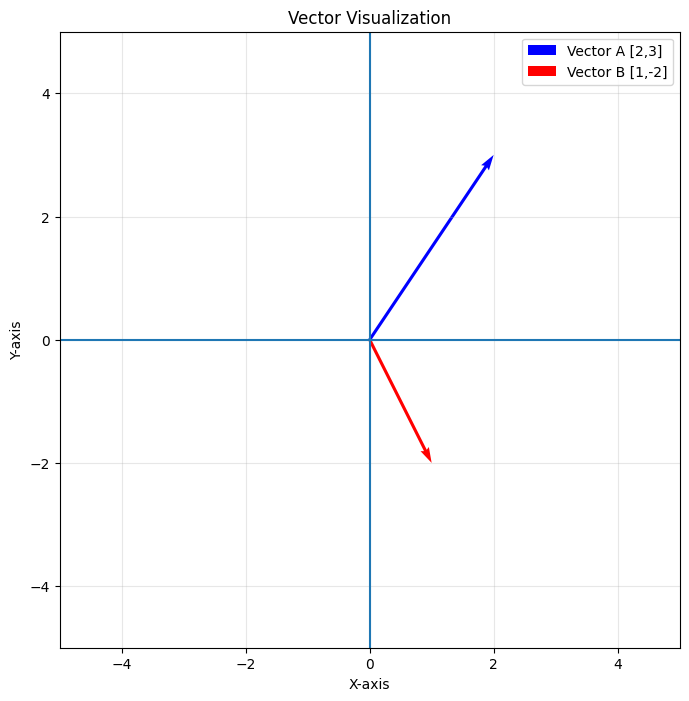

In [112]:

# Visualize our vectors
plot_vectors([vector_a, vector_b], ['blue', 'red'], ['Vector A [2,3]', 'Vector B [1,-2]'])


## 2. Vector Operations

### 2.1 Vector Addition
Adding two vectors means adding their corresponding components:

$\vec{a} + \vec{b} = \begin{bmatrix} a_1 \\ a_2 \end{bmatrix} + \begin{bmatrix} b_1 \\ b_2 \end{bmatrix} = \begin{bmatrix} a_1 + b_1 \\ a_2 + b_2 \end{bmatrix}$

**Geometric interpretation:** Place the tail of the second vector at the head of the first

Vector A: [2 3]
Vector B: [ 1 -2]
A + B = [3 1]


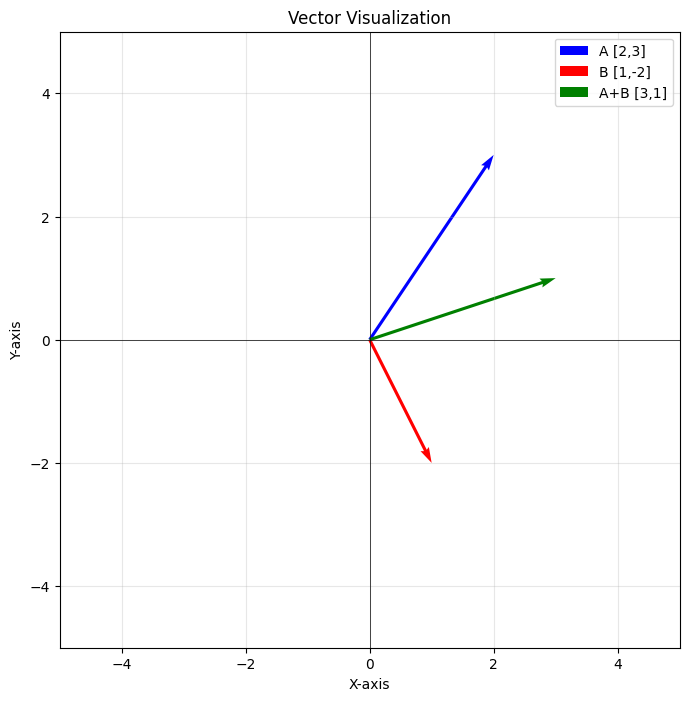

In [32]:
# Vector addition
vector_sum = vector_a + vector_b

print("Vector A:", vector_a)
print("Vector B:", vector_b)
print("A + B =", vector_sum)

# Visualize addition
plot_vectors([vector_a, vector_b, vector_sum], 
             ['blue', 'red', 'green'], 
             ['A [2,3]', 'B [1,-2]', 'A+B [3,1]'])

### 2.2 Scalar Multiplication
Multiplying a vector by a scalar (number) scales its magnitude:

$c \cdot \vec{v} = c \cdot \begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} c \cdot v_1 \\ c \cdot v_2 \end{bmatrix}$

- If c > 1: vector gets longer
- If 0 < c < 1: vector gets shorter
- If c < 0: vector reverses direction

Original vector: [2 3]
Scaled by 2: [3.  4.5]
Scaled by 0.5: [1.  1.5]
Scaled by -1: [-2 -3]


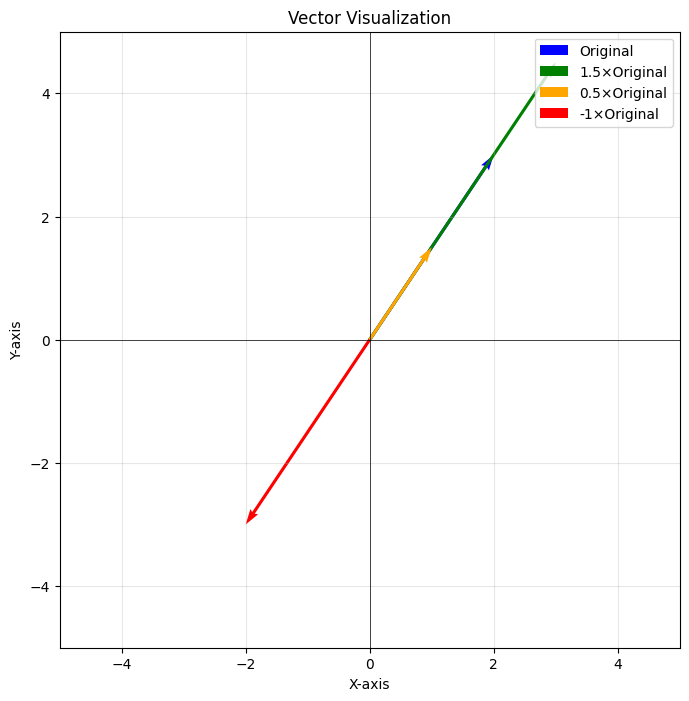

In [33]:
# Scalar multiplication
scalar = 1.5
scaled_vector = scalar * vector_a

print("Original vector:", vector_a)
print("Scaled by 2:", scaled_vector)

# Try different scalars
vector_half = 0.5 * vector_a
vector_negative = -1 * vector_a

print("Scaled by 0.5:", vector_half)
print("Scaled by -1:", vector_negative)

# Visualize
plot_vectors([vector_a, scaled_vector, vector_half, vector_negative],
             ['blue', 'green', 'orange', 'red'],
             ['Original', '1.5×Original', '0.5×Original', '-1×Original'])

### 2.3 Vector Subtraction
Subtracting vectors: $\vec{a} - \vec{b} = \vec{a} + (-\vec{b})$

A  = [2 3]
B = [ 1 -2]
A - B = [1 5]
A + (-B) = [1 5]


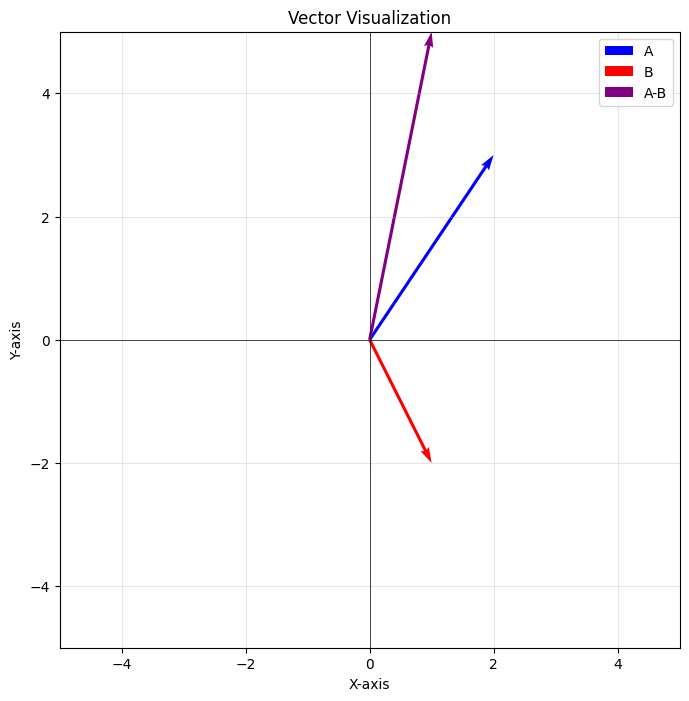

In [34]:
# Vector subtraction
vector_diff = vector_a - vector_b
print("A  =", vector_a)
print("B =", vector_b)
print("A - B =", vector_diff)

# This is equivalent to A + (-B)
vector_diff_alternative = vector_a + (-1 * vector_b)
print("A + (-B) =", vector_diff_alternative)

plot_vectors([vector_a, vector_b, vector_diff],
             ['blue', 'red', 'purple'],
             ['A', 'B', 'A-B'])


## 3. Vector Properties

### 3.1 Magnitude (Length)
The magnitude or **norm** of a vector is its length:

$||\vec{v}|| = \sqrt{v_1^2 + v_2^2 + ... + v_n^2}$

This comes from the Pythagorean theorem!

In [35]:
# Calculate magnitude
magnitude_a = np.linalg.norm(vector_a)

# Manual calculation to understand the formula
magnitude_manual = np.sqrt(vector_a[0]**2 + vector_a[1]**2)

print("Vector A:", vector_a)
print("Magnitude (NumPy):", magnitude_a)
print("Magnitude (Manual):", magnitude_manual)
print(f"\nInterpretation: Vector A has length {magnitude_a:.2f} units")

# For 3D vector
magnitude_3d = np.linalg.norm(vector_3d)
print(f"\n3D Vector {vector_3d} has magnitude: {magnitude_3d:.2f}")

Vector A: [2 3]
Magnitude (NumPy): 3.605551275463989
Magnitude (Manual): 3.605551275463989

Interpretation: Vector A has length 3.61 units

3D Vector [1 2 3] has magnitude: 3.74


### 3.2 Unit Vectors (Normalization)
A **unit vector** has magnitude 1. We create it by dividing by the magnitude:

$\hat{v} = \frac{\vec{v}}{||\vec{v}||}$

**Why it matters in ML:** Feature normalization/standardization uses this concept!

Original vector: [2 3]
Unit vector: [0.5547002  0.83205029]
Magnitude of unit vector: 1.0


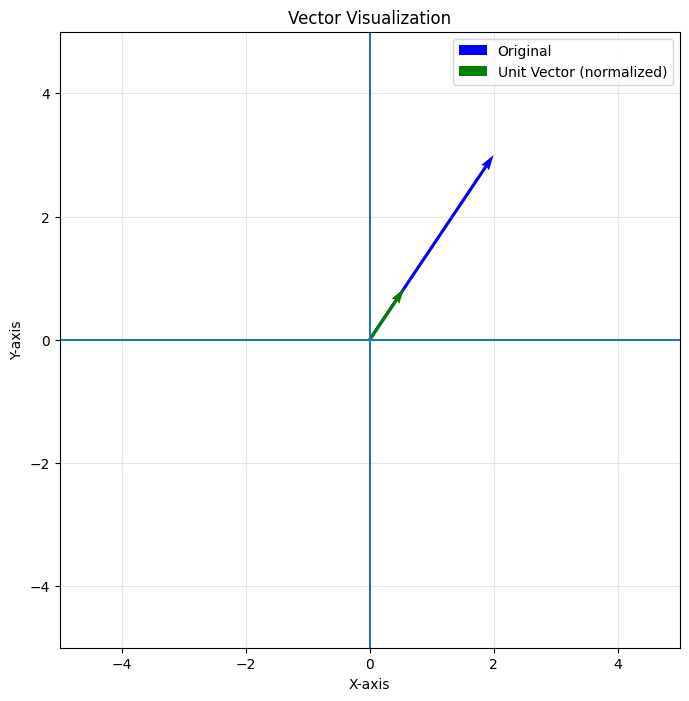

In [113]:
# Create unit vector
unit_vector_a = vector_a / np.linalg.norm(vector_a)

def unit_vector(vector):
    return vector / np.linalg.norm(vector)

unit_vector(vector_a)

print("Original vector:", vector_a)
print("Unit vector:", unit_vector_a)
print("Magnitude of unit vector:", np.linalg.norm(unit_vector_a))

# Visualize
plot_vectors([vector_a, unit_vector_a],
             ['blue', 'green'],
             ['Original', 'Unit Vector (normalized)'])

### 3.3 Dot Product (Inner Product)
The dot product is a **scalar** result from two vectors:

$\vec{a} \cdot \vec{b} = a_1b_1 + a_2b_2 + ... + a_nb_n$

**Alternative formula:** $\vec{a} \cdot \vec{b} = ||\vec{a}|| \cdot ||\vec{b}|| \cdot \cos(\theta)$

where θ is the angle between vectors

**Key properties:**
- If dot product = 0 → vectors are perpendicular (orthogonal)
- If dot product > 0 → angle < 90°
- If dot product < 0 → angle > 90°
- If dot product = 1 → angle = 0° -> exactly similar 
- If dot product = -1 → angle = 180° -> exactly opposite 
  > This is the core idea behind cosine similarity used in NLP and recommender systems.

In [37]:
# Dot product
dot_product = np.dot(vector_a, vector_b)

# Alternative notation
dot_product_alt = vector_a @ vector_b  # Matrix multiplication operator

# Manual calculation
dot_manual = vector_a[0]*vector_b[0] + vector_a[1]*vector_b[1]

print("Vector A:", vector_a)
print("Vector B:", vector_b)
print("Dot product (np.dot):", dot_product)
print("Dot product (@):", dot_product_alt)
print("Dot product (manual):", dot_manual)

# Calculate angle between vectors
cos_angle = dot_product / (np.linalg.norm(vector_a) * np.linalg.norm(vector_b))
angle_rad = np.arccos(cos_angle)  #np.arccos() = inverse cosine function (cos⁻¹). It gives the angle θ in radians whose cosine is cos_angle.
angle_deg = np.degrees(angle_rad)  # np.degrees() converts radians → degrees: degrees=radians×180 / 𝜋


print(f"\nAngle between vectors: {angle_deg:.2f} degrees")

Vector A: [2 3]
Vector B: [ 1 -2]
Dot product (np.dot): -4
Dot product (@): -4
Dot product (manual): -4

Angle between vectors: 119.74 degrees


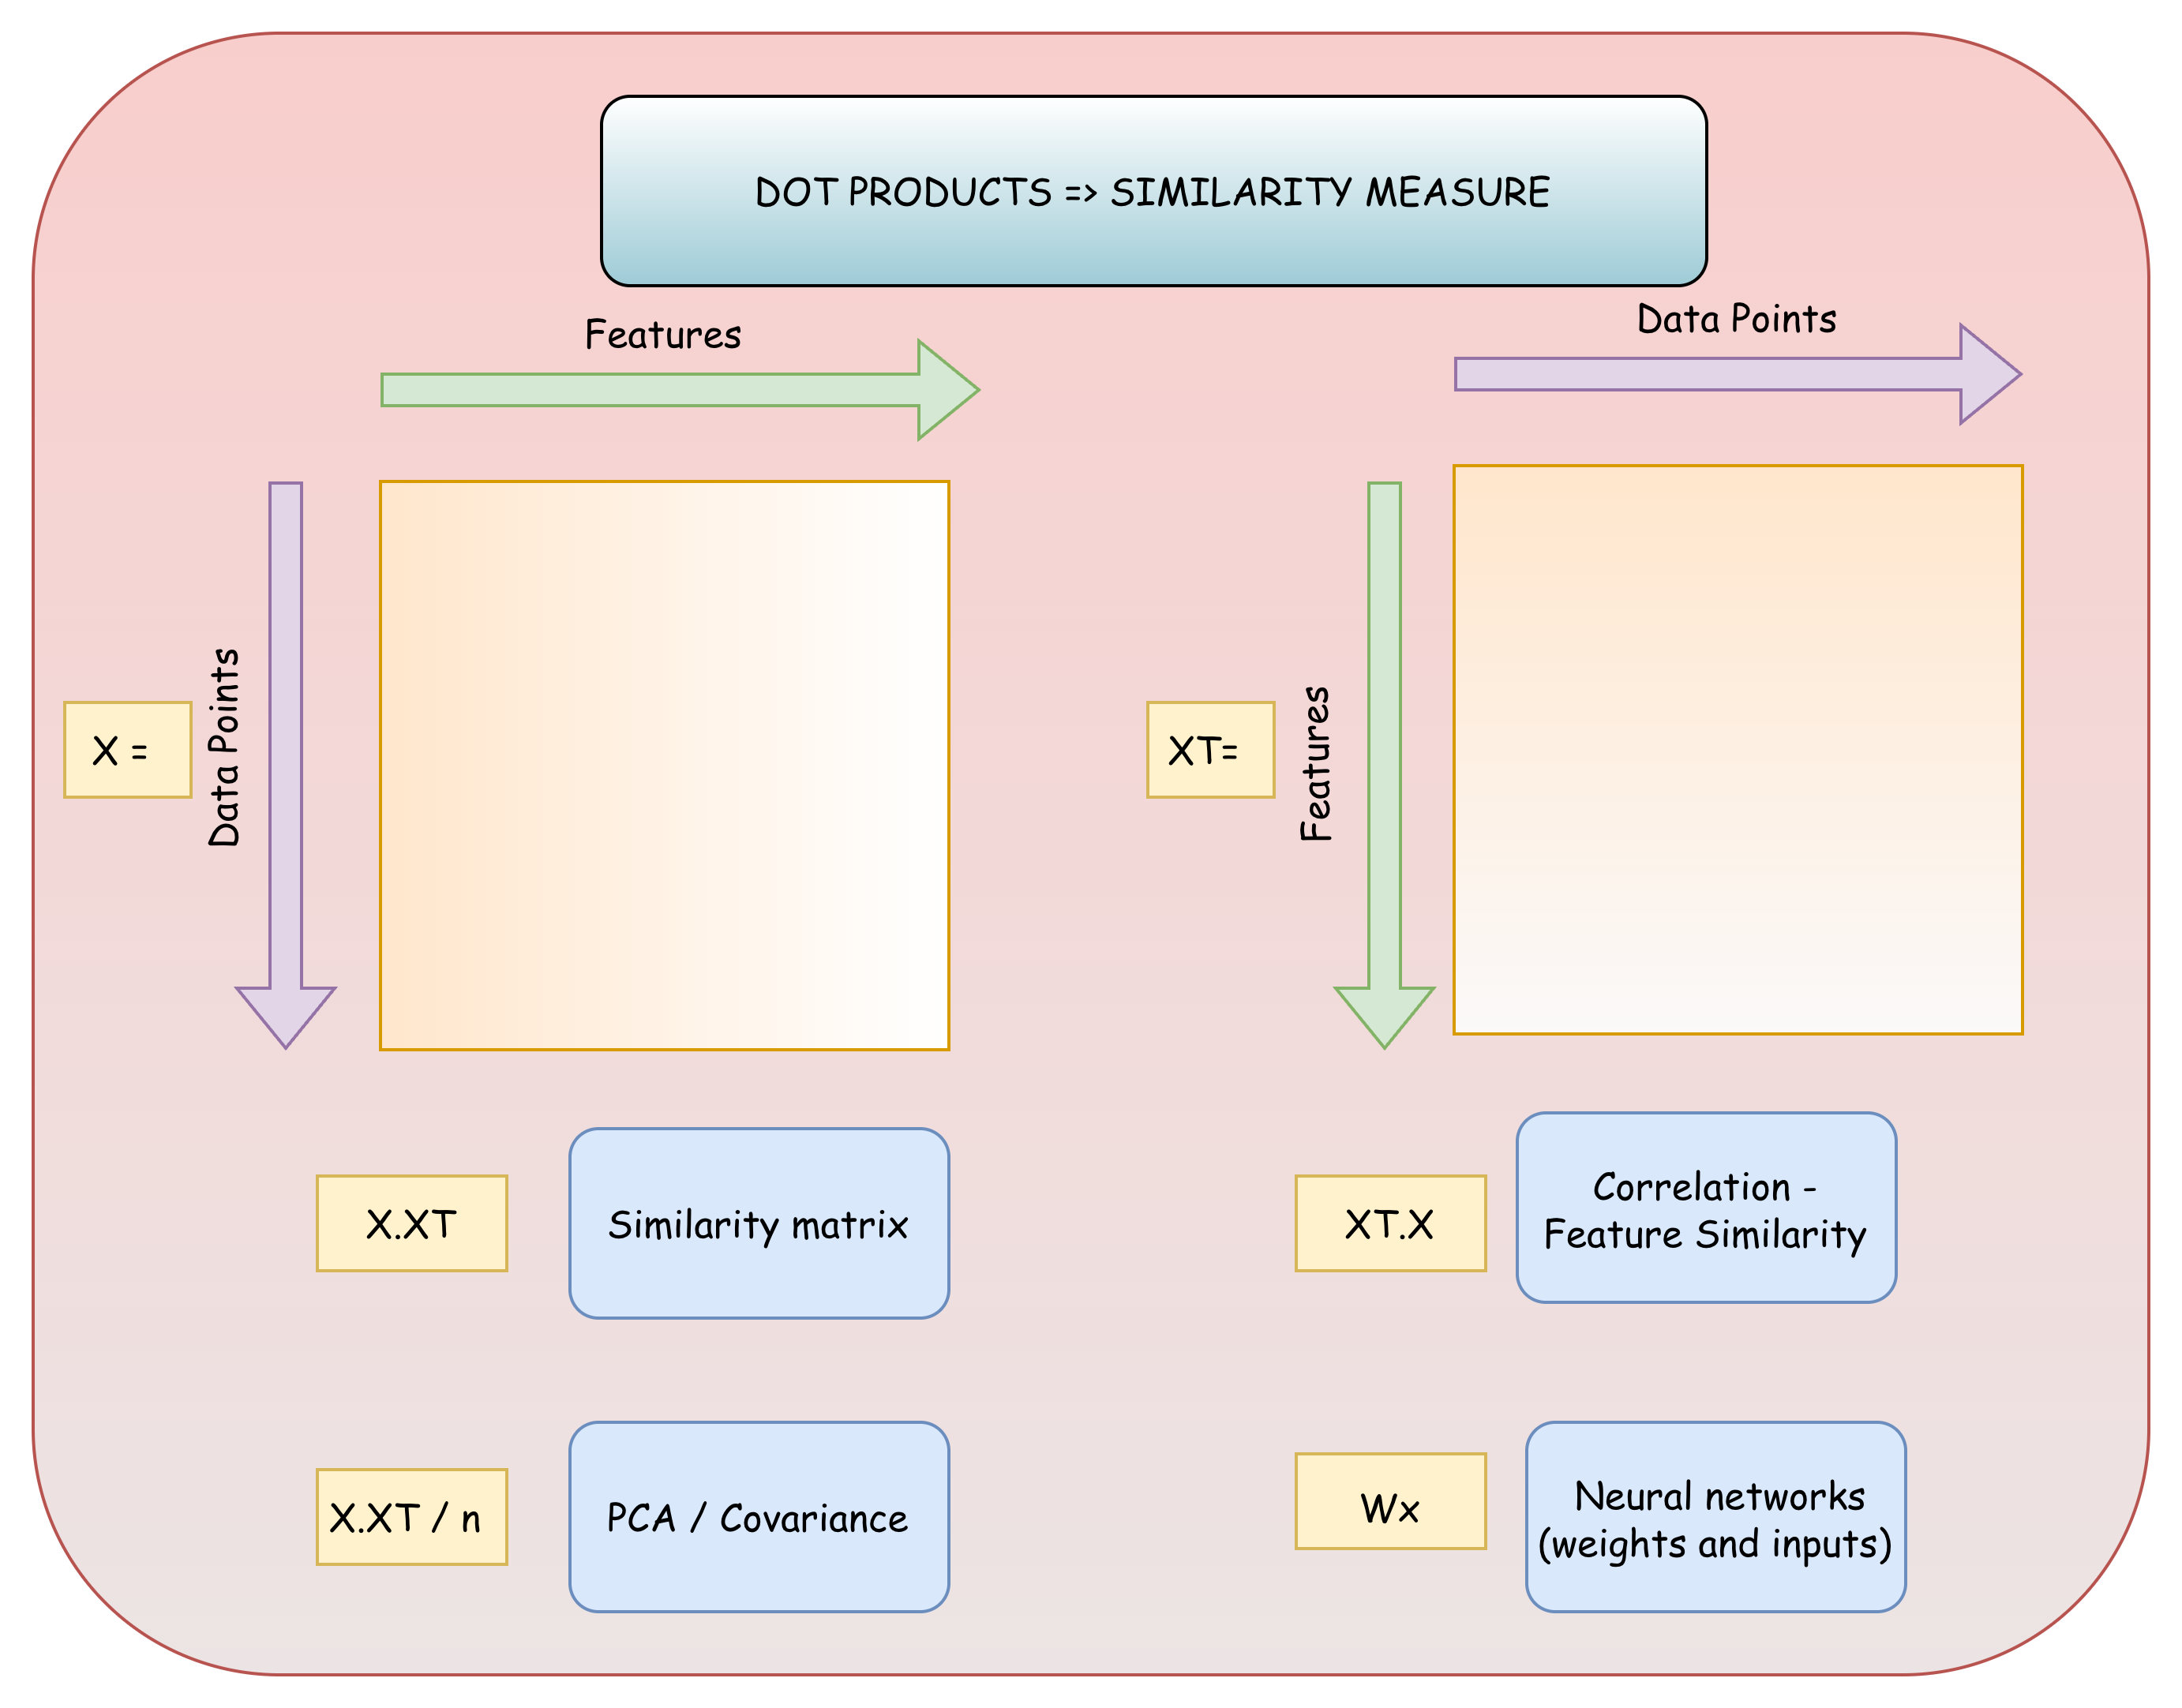

### Testing Orthogonality

Perpendicular vectors:
Vector 1: [1 0]
Vector 2: [0 1]
Dot product: 0
Are they orthogonal? True


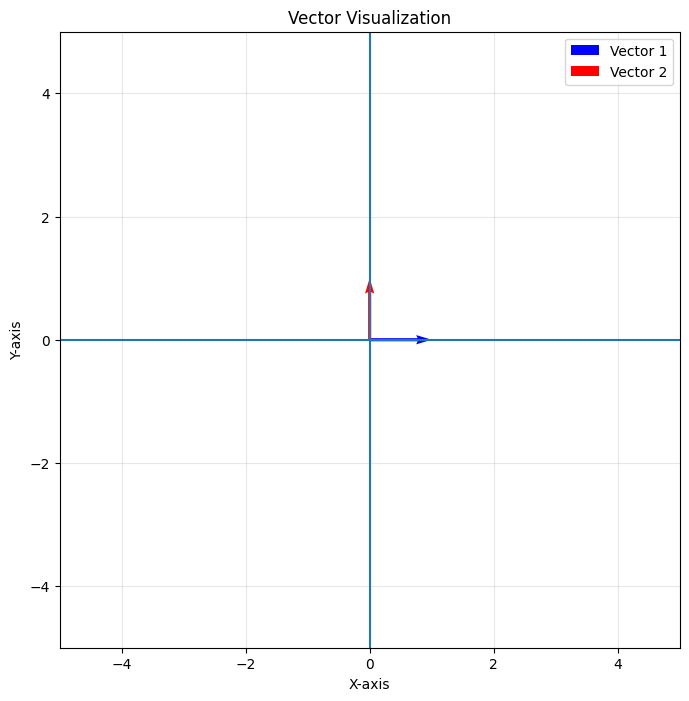

In [114]:
# Create perpendicular vectors
vec1 = np.array([1, 0])
vec2 = np.array([0, 1])

dot_perpendicular = np.dot(vec1, vec2)
print("Perpendicular vectors:")
print("Vector 1:", vec1)
print("Vector 2:", vec2)
print("Dot product:", dot_perpendicular)
print("Are they orthogonal?", dot_perpendicular == 0)

plot_vectors([vec1, vec2], ['blue', 'red'], ['Vector 1', 'Vector 2'])


## 4. Why Vectors Matter in Machine Learning

### 4.1 Data Representation
Every data point is a vector of features!

In [115]:
# Example: House data
# Features: [square_feet, bedrooms, bathrooms, age_years]
house1 = np.array([2000, 3, 2, 10])
house2 = np.array([1500, 2, 1, 5])
#house3 = np.array([2000, 2, 1, 1])
house3 = np.array([2500, 4, 3, 15])

print("House 1 (as vector):", house1)
print("House 2 (as vector):", house2)
print("House 3 (as vector):", house3)

# Calculate similarity using dot product
similarity_1_2 = np.dot(house1, house2)
similarity_1_3 = np.dot(house1, house3)

print("\nSimilarity (house1 vs house2):", similarity_1_2)
print("Similarity (house1 vs house3):", similarity_1_3)



print("\nSimilarity (house1 vs house2):", similarity_1_2/(np.linalg.norm(house1)*np.linalg.norm(house2)))
print("Similarity (house1 vs house3):", similarity_1_3/(np.linalg.norm(house1)*np.linalg.norm(house2)))



print("\nHouse 3 is more similar to House 1!",[unit_vector(house1), unit_vector(house2), unit_vector(house3)])




House 1 (as vector): [2000    3    2   10]
House 2 (as vector): [1500    2    1    5]
House 3 (as vector): [2500    4    3   15]

Similarity (house1 vs house2): 3000058
Similarity (house1 vs house3): 5000168

Similarity (house1 vs house2): 0.9999985417247994
Similarity (house1 vs house3): 1.6666880134914082

House 3 is more similar to House 1! [array([9.99985875e-01, 1.49997881e-03, 9.99985875e-04, 4.99992938e-03]), array([9.99993333e-01, 1.33332444e-03, 6.66662222e-04, 3.33331111e-03]), array([0.99998   , 0.00159997, 0.00119998, 0.00599988])]


### 4.2 Distance Metrics
Measuring how far apart two data points are

Point 1: [1 2]
Point 2: [4 6]

Euclidean distance: 5.0
Manhattan distance: 7


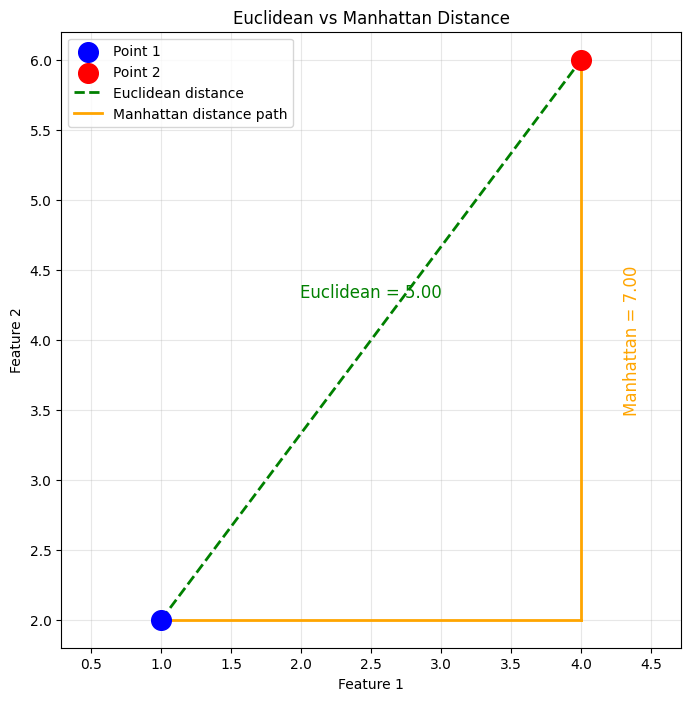

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Euclidean distance (L2 norm)
def euclidean_distance(v1, v2):
    return np.linalg.norm(v1 - v2)

# Manhattan distance (L1 norm)
def manhattan_distance(v1, v2):
    return np.sum(np.abs(v1 - v2))

point1 = np.array([1, 2])
point2 = np.array([4, 6])

print("Point 1:", point1)
print("Point 2:", point2)
print("\nEuclidean distance:", euclidean_distance(point1, point2))
print("Manhattan distance:", manhattan_distance(point1, point2))

# --- Visualization ---
plt.figure(figsize=(8, 8))

# Plot points
plt.scatter(*point1, color='blue', s=200, label='Point 1', zorder=3)
plt.scatter(*point2, color='red', s=200, label='Point 2', zorder=3)

# Euclidean distance line (direct diagonal)
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 
         'g--', linewidth=2, label='Euclidean distance')

# Manhattan distance path (L-shaped)
# Step 1: horizontal move (x1 → x2)
plt.plot([point1[0], point2[0]], [point1[1], point1[1]], 
         'orange', linewidth=2, label='Manhattan distance path')
# Step 2: vertical move (y1 → y2)
plt.plot([point2[0], point2[0]], [point1[1], point2[1]], 
         'orange', linewidth=2)

# Annotate distances
plt.text((point1[0]+point2[0])/2, (point1[1]+point2[1])/2 + 0.3, 
         f"Euclidean = {euclidean_distance(point1, point2):.2f}",
         color='green', fontsize=12, ha='center')
plt.text(point2[0]+0.3, (point1[1]+point2[1])/2,
         f"Manhattan = {manhattan_distance(point1, point2):.2f}",
         color='orange', fontsize=12, rotation=90, va='center')

# Styling
plt.grid(True, alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Euclidean vs Manhattan Distance')
plt.legend()
plt.axis('equal')
plt.show()


### 4.3 Linear Combinations
Creating new vectors from existing ones - fundamental to neural networks!

Linear combination: 2*[1 0] + 3*[0 1]
Result: [2 3]


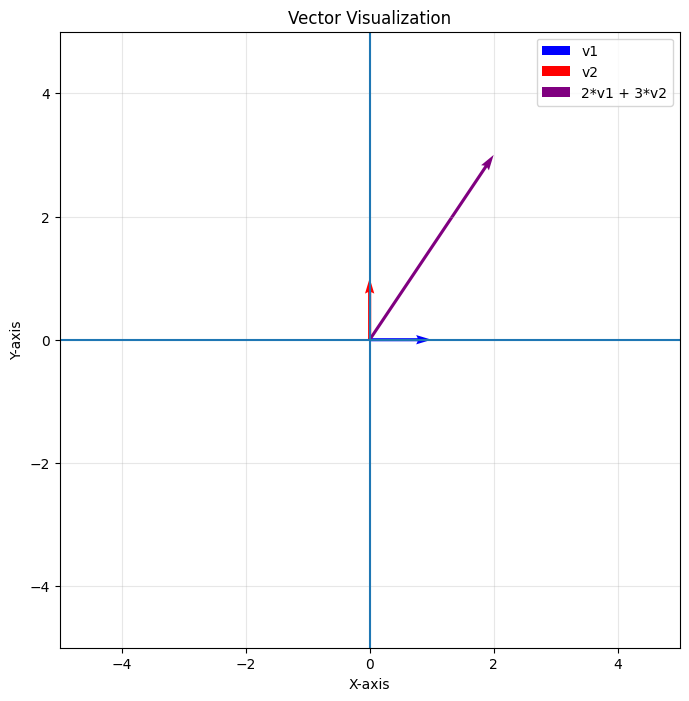

In [117]:
# Linear combination: c1*v1 + c2*v2 + ... + cn*vn
v1 = np.array([1, 0])
v2 = np.array([0, 1])

# Create different vectors using linear combinations
c1, c2 = 2, 3
new_vector = c1 * v1 + c2 * v2

print(f"Linear combination: {c1}*{v1} + {c2}*{v2}")
print("Result:", new_vector)

# This is exactly what happens in a neural network layer!
# output = weight1*input1 + weight2*input2 + ... + bias

plot_vectors([v1, v2, new_vector],
             ['blue', 'red', 'purple'],
             ['v1', 'v2', '2*v1 + 3*v2'])

---
## 5. Practice Exercises

Try these exercises to reinforce your understanding!

### Exercise 1: Basic Operations
Given vectors a = [3, 4] and b = [1, 2], calculate:
1. a + b
2. 2a - b
3. ||a||
4. a · b

In [118]:
# Exercise 1 - Your code here
a = np.array([3, 4])
b = np.array([1, 2])

# 1. Addition
result1 = a+b 
# YOUR CODE

# 2. Linear combination
result2 = 2*a-b
# YOUR CODE

# 3. Magnitude
result3 = np.linalg.norm(a)
# YOUR CODE

# 4. Dot product
result4 = a*b 

print("Results:")
print("1.", result1)
print("2.", result2)
print("3.", result3)
print("4.", result4)

Results:
1. [4 6]
2. [5 6]
3. 5.0
4. [3 8]


### Exercise 2: Unit Vectors
Create a unit vector in the direction of [6, 8]

In [119]:
# Exercise 2 - Your code here
vec = np.array([6, 8])

unit_vec = unit_vector(vec)# YOUR CODE

print("Original vector:", vec)
print("Unit vector:", unit_vec)
print("Magnitude of unit vector:", np.linalg.norm(unit_vec))

Original vector: [6 8]
Unit vector: [0.6 0.8]
Magnitude of unit vector: 1.0


### Exercise 3: Check Orthogonality
Are vectors [3, 4] and [-4, 3] orthogonal? Verify using dot product.

In [120]:
# Exercise 3 - Your code here
v1 = np.array([3, 4])
v2 = np.array([-4, 3])

def orthogonal(vector1, vector2):
    return np.dot(vector1, vector2) == 0

is_orthagonal = orthogonal(v1, v2)
print(is_orthagonal)

# YOUR CODE


True


### Exercise 4: Real-World Application
You have product ratings as vectors:
- User1 ratings: [5, 3, 4, 2, 5] (for products A, B, C, D, E)
- User2 ratings: [4, 4, 3, 3, 4]
- User3 ratings: [1, 2, 1, 5, 1]

Which user is most similar to User1? Use cosine similarity:


\\\text{cosine_similarity} = \frac{\vec{a} \cdot \vec{b}}{||\vec{a}|| \cdot ||\vec{b}||}\\

In [121]:
# Exercise 4 - Your code here
user1 = np.array([5, 3, 4, 2, 5])
user2 = np.array([4, 4, 3, 3, 4])
user3 = np.array([1, 2, 1, 5, 1])

def cosine_similarity(a, b):
    return  np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))



In [122]:
sim_1_2 = cosine_similarity(user1, user2)
sim_1_3 = cosine_similarity(user1, user3)

print(f"Similarity between User1 and User2: {sim_1_2}")
print(f"Similarity between User1 and User3: {sim_1_3}")

if sim_1_2 > sim_1_3:
    print("User2 is more similar to User1!")
else:
    print("User3 is more similar to User1!")

Similarity between User1 and User2: 0.9694212304545443
Similarity between User1 and User3: 0.5966679631317975
User2 is more similar to User1!


---
## 6. Solutions to Exercises

Run this cell only after attempting the exercises!

In [123]:
print("=== SOLUTIONS ===")

# Exercise 1
print("\nExercise 1:")
a = np.array([3, 4])
b = np.array([1, 2])
print("1. a + b =", a + b)
print("2. 2a - b =", 2*a - b)
print("3. ||a|| =", np.linalg.norm(a))
print("4. a · b =", np.dot(a, b))

# Exercise 2
print("\nExercise 2:")
vec = np.array([6, 8])
unit_vec = vec / np.linalg.norm(vec)
print("Unit vector:", unit_vec)
print("Verification (should be 1.0):", np.linalg.norm(unit_vec))

# Exercise 3
print("\nExercise 3:")
v1 = np.array([3, 4])
v2 = np.array([-4, 3])
dot_prod = np.dot(v1, v2)
print("Dot product:", dot_prod)
print("Are they orthogonal?", dot_prod == 0)

# Exercise 4
print("\nExercise 4:")
user1 = np.array([5, 3, 4, 2, 5])
user2 = np.array([4, 4, 3, 3, 4])
user3 = np.array([1, 2, 1, 5, 1])

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

sim_1_2 = cosine_similarity(user1, user2)
sim_1_3 = cosine_similarity(user1, user3)
print(f"Similarity (User1 vs User2): {sim_1_2:.3f}")
print(f"Similarity (User1 vs User3): {sim_1_3:.3f}")
print("User2 is more similar!" if sim_1_2 > sim_1_3 else "User3 is more similar!")

=== SOLUTIONS ===

Exercise 1:
1. a + b = [4 6]
2. 2a - b = [5 6]
3. ||a|| = 5.0
4. a · b = 11

Exercise 2:
Unit vector: [0.6 0.8]
Verification (should be 1.0): 1.0

Exercise 3:
Dot product: 0
Are they orthogonal? True

Exercise 4:
Similarity (User1 vs User2): 0.969
Similarity (User1 vs User3): 0.597
User2 is more similar!


---
## 7. Key Takeaways

### What You Learned:
1. ✅ Vectors represent data points with multiple features
2. ✅ Vector operations: addition, scalar multiplication, dot product
3. ✅ Magnitude measures vector length
4. ✅ Unit vectors have length 1 (normalization)
5. ✅ Dot product measures similarity/angle between vectors
6. ✅ Vectors are fundamental to ML algorithms

### Where Vectors Appear in ML:
- **Feature vectors:** Each data sample
- **Weight vectors:** Neural network parameters
- **Word embeddings:** Text represented as vectors
- **Distance metrics:** K-NN, clustering
- **Gradient descent:** Direction of steepest descent
- **Similarity measures:** Recommendation systems

### Next Steps:
- Move to **Matrices** notebook (vectors of vectors!)
- Then explore **Tensor Operations** for deep learning

---

**Congratulations! You've mastered vectors in linear algebra! 🎉**